In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sb

In [2]:
cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
cancer.columns=['ID', 'Clump_Thickness', 'U_Cell_Size', 'U_Cell_Shape','Marg_Adhes', 'Epi_Cell_Size', 'Bare_Nuc', 'Chromatin', 'Nucleoli','Mitoses', 'Class']
cancer = cancer[~((cancer['Bare_Nuc'] == '?' ))].astype(float)
cols=['Clump_Thickness', 'U_Cell_Size', 'U_Cell_Shape','Marg_Adhes', 'Epi_Cell_Size', 'Bare_Nuc', 'Chromatin', 'Nucleoli','Mitoses']
cancer.head()

,ID,Clump_Thickness,U_Cell_Size,U_Cell_Shape,Marg_Adhes,Epi_Cell_Size,Bare_Nuc,Chromatin,Nucleoli,Mitoses,Class
0,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
1,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
2,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
3,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
4,1017122.0,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,4.0


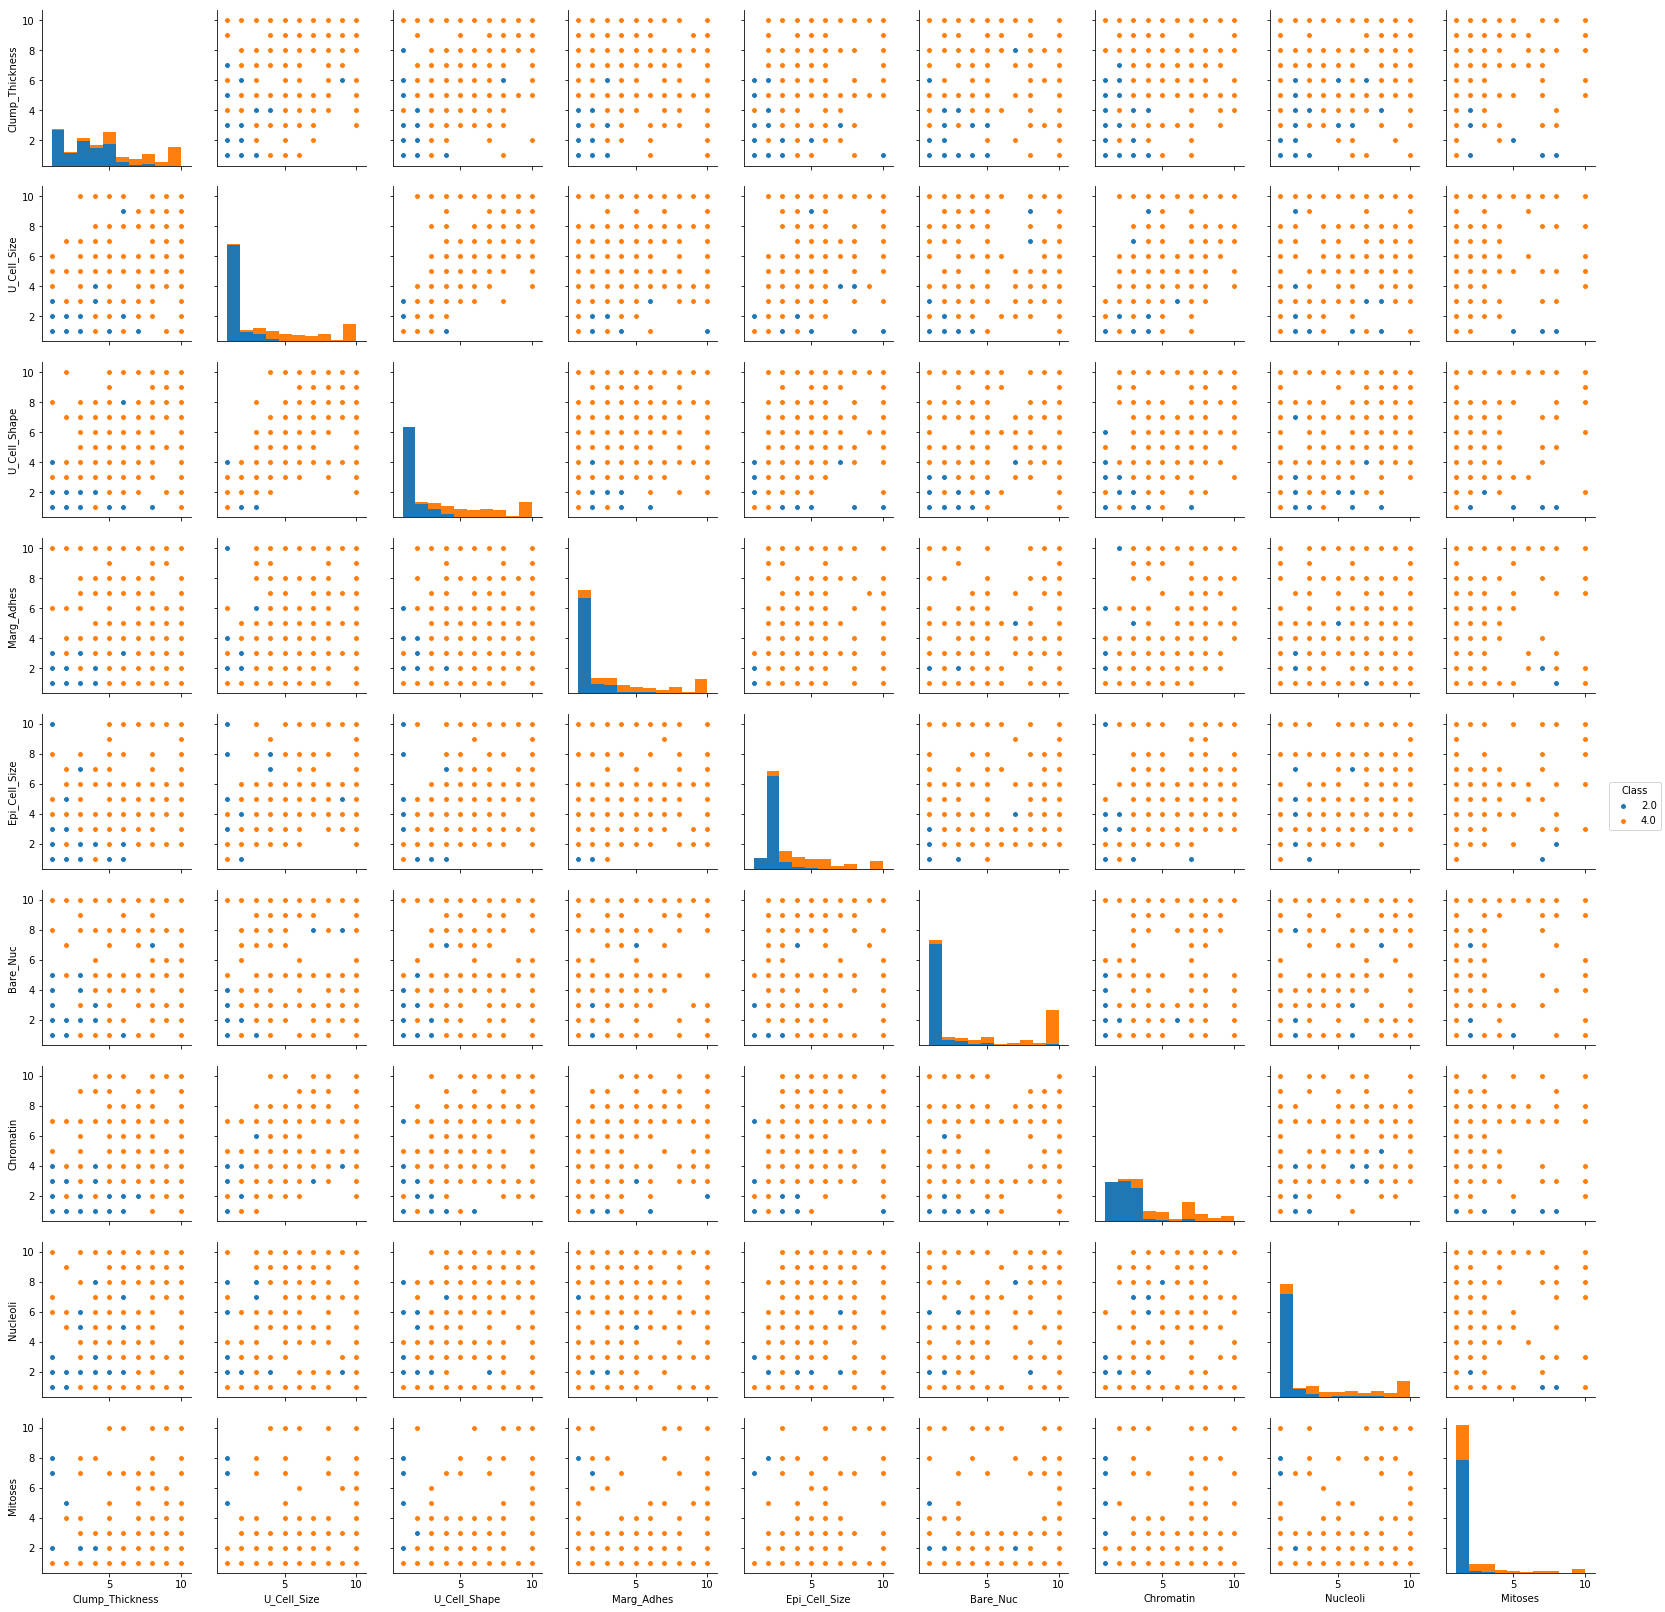

In [4]:
sb.pairplot(cancer,vars=cols,hue='Class')

In [66]:
X, y = cancer.iloc[:, [2, 6]].values, cancer['Class']
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std=sc.fit_transform(X)
X_std

array([[ 0.27611976,  1.77117926],
       [-0.70298082, -0.42508302],
       [ 1.58158721,  0.12398255],
       ..., 
       [ 2.23432094, -0.15055024],
       [ 1.58158721,  0.12398255],
       [ 1.58158721,  0.39851533]])

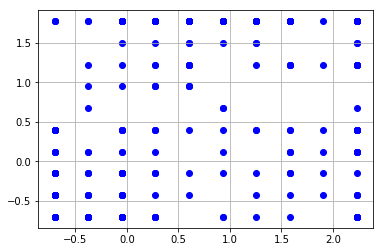

In [67]:
plt.scatter(X_std[:,0],X_std[:,1],c='blue',marker='o')
plt.grid()
plt.show()

In [107]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2,init='random',n_init=100,max_iter=30,tol=1e-04,random_state=0)
y_km = km.fit_predict(X_std)

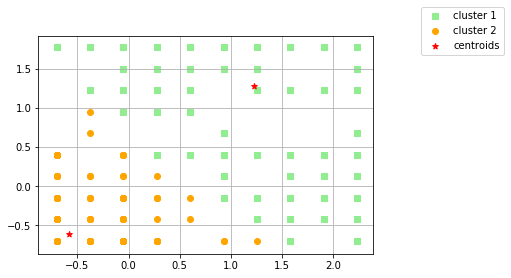

In [109]:
plt.scatter(X_std[y_km==0,0],X_std[y_km ==0,1],c='lightgreen',marker='s',label='cluster 1')
plt.scatter(X_std[y_km ==1,0],X_std[y_km ==1,1],c='orange',marker='o',label='cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',c='red',label='centroids')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.grid()
plt.show()

In [110]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 347.49


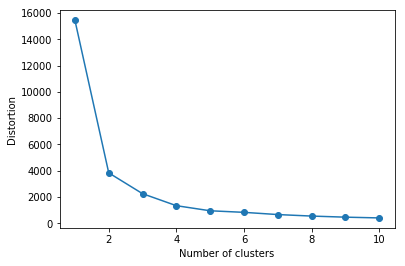

In [111]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

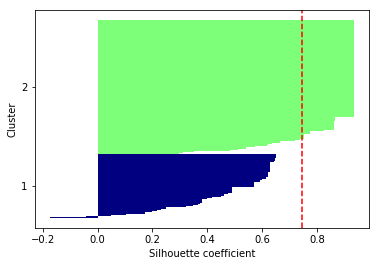

In [112]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_std,y_km,metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()